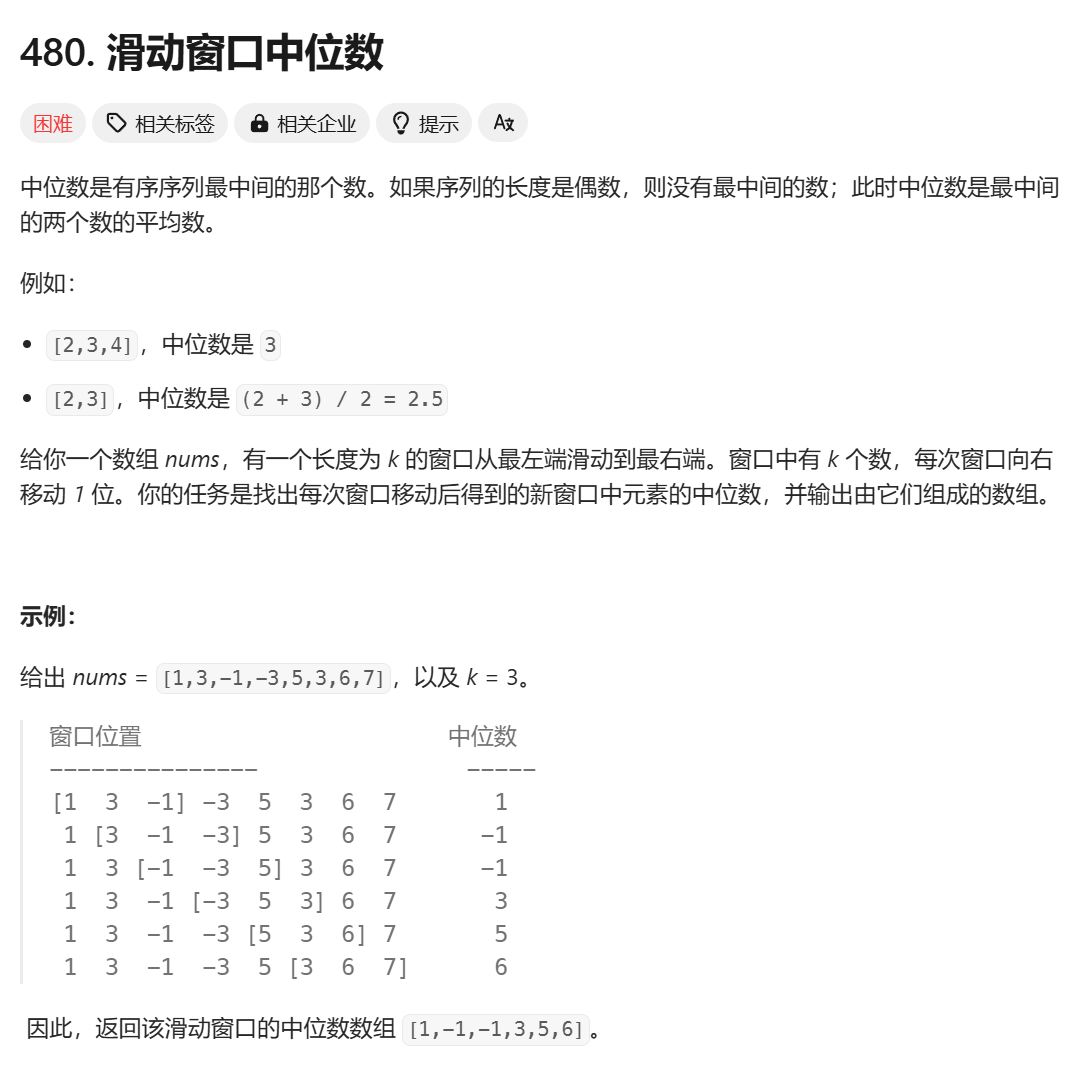

In [3]:
# 返回中间值的和的一半。（如果长度为单数，则求和两次）
a = [1,2]
(a[(len(a)-1)//2] + a[len(a)//2]) / 2

1.5

- 对于这种中位数求解，适合用对顶堆来解决
- 用大顶堆来存较小的一半
- 用小顶堆来存较大的一半
- 然后两个顶来确定中位数

我们思考中位数的性质：如果一个数是中位数，那么在这个数组中，大于中位数的数目和小于中位数的数目，要么相等，要么就相差一。
因此，我们采用对顶堆的做法，控制所有小于等于中位数的数字放到一个堆中，控制所有比中位数大的数字放到另一个堆中，并且保证两个堆的数目相差小于等于1。这样就可以保证每一次查询中位数的时候，答案一定出于两个堆的堆顶元素之一。

初始化方法如下：

将前K个元素全部插入到small堆中。从small堆中弹出K/2个元素到big堆中。
这样，当K为奇数，则small堆元素比big堆元素多1；当K为偶数，两个堆元素相等。
取中位数的操作：

我们的插入操作可以保证每次优先插入到small堆中，因此small堆中的元素个数大于等于big堆的元素个数。
当K为奇数时候，中位数是元素数量较多的small堆 堆顶元素。
当K为偶数时候，中位数是small堆和big堆的堆顶元素平均值。
窗口滑动过程中的操作：

假定在上一次滑动之后，已经有small堆和big堆元素数目相差小于等于1.
设置当前的滑动时，balance = 0。balance表示因本次窗口滑动导致small堆元素数目与big堆元素个数差值的增量。
删除窗口左侧的元素。
由于堆无法直接删除掉某个指定元素，先欠下这个账，等某次元素出现在堆顶的时候，再删除他。mp记录这个元素欠账的个数。mp[left]++;
虽然没有真的在堆数据结构中删除窗口最左侧的元素，但是在我们的心中已经删掉他了。堆两侧的平衡性发生了变化。如果left<=small.top()，就说明删掉的元素在small堆中，我们让balance--;否则，就说明删掉的元素在big堆中，让balance++;
添加进来窗口右侧的元素。如果right<=small.top()，就应该让这个元素放到samll堆里面，balance++；否则放到big堆里，balance--。
经过上面的操作，balance要么为0，要么为2，要么为-2。我们需要经过调整使得balance为0。
如果balance为0，在这次窗口滑动之前已经是平衡的，这次调整也没有让两堆的数目变化，所以不用调整两边的堆。
如果balance为2，就说明small堆的元素比big堆的元素多了两个。从small堆减少一个，big堆里增加一个，就可以让两边相等。big.push(small.top());small.pop();
如果balance为-2，就说明big堆的元素比small堆的元素多了两个。从big堆减少一个，small堆里增加一个，就可以让两边相等。small.push(big.top());big.pop();
调整完了，现在该欠债还钱了。不能让那些早该删除的元素涉及到中位数的运算。
分别检查两边的堆顶元素，如果堆顶元素欠着债，则弹出堆顶元素，直到堆顶元素没有欠债为止。有朋友问了：堆顶下面也有欠债的怎么办呢？我们之前说过，取中位数的时候只与堆顶元素有关，至于那些堆顶下面欠着债的，欠着就欠着吧，等他们到堆顶的时候再弹出去就好了。
最后，添加中位数即可。


链接：https://leetcode.cn/problems/sliding-window-median/solutions/589213/feng-xian-dui-chong-shuang-dui-dui-ding-hq1dt/


In [8]:
import heapq
from collections import defaultdict

class Solution:
    def __init__(self):
        self.small = []  # 大顶堆 存放负数
        self.big = []    # 小顶堆
        self.mp = defaultdict(int)  # 欠债
    
    def get(self, k):
        if k % 2:  # 奇数
            return -self.small[0]
        else:
            return (-self.small[0] + self.big[0]) / 2.0
    
    def medianSlidingWindow(self, nums, k):
        # 先初始化，大顶堆中存放的要多一个
        for i in range(k):
            heapq.heappush(self.small, -nums[i])
        for i in range(k // 2):
            heapq.heappush(self.big, -heapq.heappop(self.small))
        
        ans = [self.get(k)]
        
        for i in range(k, len(nums)):
            balance = 0
            l = nums[i - k]
            self.mp[l] += 1

            # 现在看要剪掉的
            # 要删掉的元素在小堆中，所以需要向小堆多加一个
            if self.small and l <= -self.small[0]:
                balance -= 1
            # 要删掉的元素在大堆中
            else:
                balance += 1
                
            # 现在看要添加的
            # 要保证small中有值才能查询堆顶
            if self.small and nums[i] <= -self.small[0]:
                heapq.heappush(self.small, -nums[i])
                balance += 1
            else:
                heapq.heappush(self.big, nums[i])
                balance -= 1
            
            # 平衡（由于滑动窗口导致的长度区别）
            if balance > 0:
                heapq.heappush(self.big, -heapq.heappop(self.small))
            elif balance < 0:
                heapq.heappush(self.small, -heapq.heappop(self.big))

            # 还债（延迟删除）
            while self.small and self.mp[-self.small[0]] > 0:
                self.mp[-self.small[0]] -= 1
                heapq.heappop(self.small)
            
            while self.big and self.mp[self.big[0]] > 0:
                self.mp[self.big[0]] -= 1
                heapq.heappop(self.big)
            
            ans.append(self.get(k))
        
        return ans

print(Solution().medianSlidingWindow([1,3,-1,-3,5,3,6,7], 3))


[1, -1, -1, 3, 5, 6]
